# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries

# imports

import pandas as pd
import numpy as np
from scipy.stats import trim_mean   # conda install scipy
from statsmodels import robust      # conda install -c conda-forge statsmodels 
import wquantiles                   # pip install wquantiles

import seaborn as sns
import matplotlib.pylab as plt
import random
from matplotlib.ticker import PercentFormatter

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [163]:
# your code here

dice_faces = list(range(1,7))
dice_faces

roll_the_dice_original = pd.DataFrame([random.choices(dice_faces) for i in range(1,11)])
roll_the_dice_original.columns = ['Result']
roll_the_dice_original


,Result
0,1
1,3
2,6
3,2
4,2
5,4
6,1
7,3
8,1
9,5


In [164]:
# Decidí hacer una copia del dataframe original para no afectar los resultados por el aleatorio
roll_the_dice = roll_the_dice_original.copy()
roll_the_dice

,Result
0,1
1,3
2,6
3,2
4,2
5,4
6,1
7,3
8,1
9,5


#### 2.- Plot the results sorted by value.

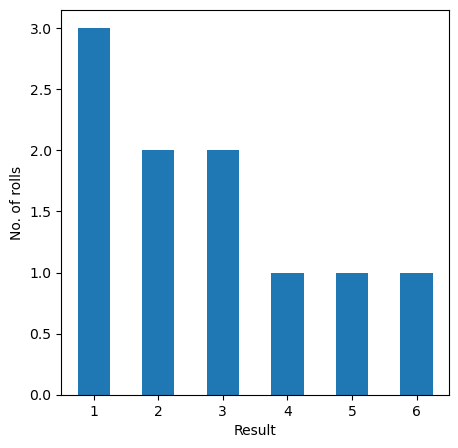

In [165]:
# your code here

# Cuenta la frecuencua de los resultados (.value_counts) y ordena por el valor de los dados (.sort_index)
ax = roll_the_dice['Result'].value_counts().sort_index().plot.bar(figsize=(5, 5)) 

ax.set_xlabel('Result') # Resultado de la cara del dado
ax.set_ylabel('No. of rolls') # Número de veces que se repite el resultado del dado
ax.tick_params(axis='x', rotation=0) # Ajustar los paramétros del eje x para rotarlos en 0 grados
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [166]:
# your code here (https://www.youtube.com/watch?v=NpEPEIMvItw&ab_channel=RocioChavezCienciadeDatos)

freq = roll_the_dice.value_counts().reset_index()
freq['Result'] = freq['Result'].astype("str") # Categorizar los resultados para que el sort se base en las frecuencias
freq

,Result,count
0,1,3
1,2,2
2,3,2
3,4,1
4,5,1
5,6,1


In [167]:
freq_df = freq.rename(columns={"count":"Freq_abs"})
freq_df

,Result,Freq_abs
0,1,3
1,2,2
2,3,2
3,4,1
4,5,1
5,6,1


In [168]:
# Creamos el ratio frecuencia relativa, dividiendo cada freq absoluta por resultado entre el número de caras del dado x 100%

freq_df["Freq_rel_%"] = (100 * freq_df["Freq_abs"] / freq_df["Freq_abs"].sum()).round(2)
freq_df

,Result,Freq_abs,Freq_rel_%
0,1,3,30.0
1,2,2,20.0
2,3,2,20.0
3,4,1,10.0
4,5,1,10.0
5,6,1,10.0


In [169]:
freq_df["Freq_rel_%"].values

array([30., 20., 20., 10., 10., 10.])

In [170]:
# Valores de frecuencias relativas "acumuladas"
freq_rel_val = freq_df["Freq_rel_%"].values # array([50.  , 33.33, 33.33, 16.67, 16.67, 16.67])
accumulate = []
counter = 0
for i in freq_rel_val: # Para cada elemento de freq_rel_val == array([50.  , 33.33, 33.33, 16.67, 16.67, 16.67])
    counter += i # (0 + 50.00, 50.00 + 33.33 ... 150.00 + 16.67)
    accumulate.append(counter)
freq_df["Freq_rel_%_acum"] = accumulate # Se crea la nueva columna con los valores guardados en accumulate
freq_df

,Result,Freq_abs,Freq_rel_%,Freq_rel_%_acum
0,1,3,30.0,30.0
1,2,2,20.0,50.0
2,3,2,20.0,70.0
3,4,1,10.0,80.0
4,5,1,10.0,90.0
5,6,1,10.0,100.0


#### Frequency distribution plot

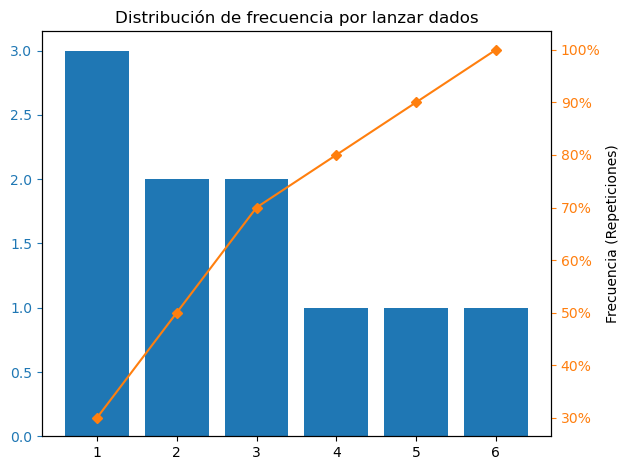

In [171]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_title('Distribución de frecuencia por lanzar dados')

ax.bar(freq_df["Result"],freq_df["Freq_abs"], color="C0")

ax2 = ax.twinx()

# freq_df.index => devuelve el indice para x
# freq_df["Freq_rel_%_acum"] => Accedo a la columna en mención
# color="C1", marker="D", ms=5 => Marcador de Diamante de tamaño 5 en color amarillo

ax2.plot(freq_df.index, freq_df["Freq_rel_%_acum"], color="C1", marker="D", ms=5)

# set_major_formatter(PercentFormatter()) => Coloca los valores en porcentajes
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

ax.set_xticks(freq_df["Result"]) # Ubicaciones de x de 'Result'
ax.set_xticklabels(freq_df["Result"], rotation=0)

plt.xlabel("Caras del dado")
plt.ylabel("Frecuencia (Repeticiones)")

fig.tight_layout()
plt.show()

#### Results sorted by value plot

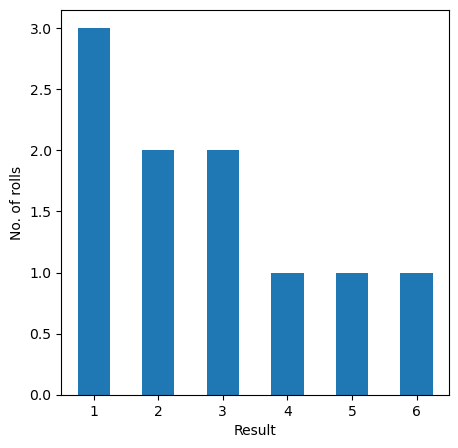

In [172]:
# your code here

# Cuenta la frecuencua de los resultados (.value_counts) y ordena por el valor de los dados (.sort_index)
ax = roll_the_dice['Result'].value_counts().sort_index().plot.bar(figsize=(5, 5)) 

ax.set_xlabel('Result') # Resultado de la cara del dado
ax.set_ylabel('No. of rolls') # Número de veces que se repite el resultado del dado
ax.tick_params(axis='x', rotation=0) # Ajustar los paramétros del eje x para rotarlos en 0 grados
plt.show()

### What is the relation between this plot and the plot above?

In [173]:
"""
1. Results sorted by value plot: Gives you information about the dice face with more repetitions (the no. one face)
2. Frequency distribution plot: I did a Pareto chart, which gives you information about the 80% of results in which
    I have to focus on number one, specially. (e.g: If I had a bet on money, I would certainly choose 1 in
    first place, or the ones followed among 2, 3 and 4, in that order.), and excluding 5 and 6.
"""

'\n1. Results sorted by value plot: Gives you information about the dice face with more repetitions (the no. one face)\n2. Frequency distribution plot: I did a Pareto chart, which gives you information about the 80% of results in which\n    I have to focus on number one, specially. (e.g: If I had a bet on money, I would certainly choose 1 in\n    first place, or the ones followed among 2, 3 and 4, in that order.), and excluding 5 and 6.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [13]:
# Test no. 1
dice_mean = roll_the_dice['Result'].sum() / len(roll_the_dice['Result'])
dice_mean

3.6

In [14]:
roll_the_dice

,Result
0,3
1,2
2,6
3,5
4,3
5,2
6,6
7,1
8,2
9,6


In [15]:
# Test no. 2
roll_the_dice['Result'].mean()

3.6

In [16]:
# your code here

def mean_sum(dataframe, column):
    row = 0
    col = 0
    for row, col_value in enumerate(dataframe[column]):
        col += col_value
        row += 1
    return col / row
mean_sum(roll_the_dice,'Result')

3.6

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [17]:
freq = roll_the_dice.value_counts().reset_index()
freq_df = freq.rename(columns={"count":"Freq_abs"})
freq_df

,Result,Freq_abs
0,2,3
1,6,3
2,3,2
3,1,1
4,5,1


In [18]:
# your code here

def mean_sum(dataframe, column):
    row = 0
    col = 0
    for row, col_value in enumerate(dataframe[column]):
        col += col_value
        row += 1
    return col / row
mean_sum(freq_df,'Result')

3.4

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [19]:
# your code here

def medianing(dataframe, column):
    sorted_values = np.sort(dataframe[column]) # Antes de hallar la mediana, ordenar los valores
    col_length = len(sorted_values)
    if col_length % 2 != 0:        
        return sorted_values[col_length // 2]
    elif col_length % 2 == 0:
        return (sorted_values[col_length // 2 - 1] + sorted_values[col_length // 2]) / 2

medianing(freq_df,'Result')

3

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [20]:
def quartiling(dataframe, column):    
    sorted_values = np.sort(dataframe[column])   
    col_length = len(sorted_values)    
    q2 = medianing(dataframe, column) # Q2 => Mediana
    
    # Q1 => La mitad de la mediana o 25% de Q2
    q1 = q2 / 2
    
    # Q3 => Le sumamos la mitad de la mediana o Q1
    q3 = q2 + q1
    
    # Q4 => Por contexto, NO puede ser mayor a 6 porque es la cara del dado con el maximo valor
    q4 = q3 + q1 if q3 + q1 <= 6 else 6    
   
    # Guardo los cuartiles en un diccionario
    quartiles_dict = {
        'Q1': q1,
        'Q2': q2,
        'Q3': q3,
        'Q4': q4
    }
    
    return quartiles_dict

quartiling(freq_df, 'Result')

{'Q1': 1.5, 'Q2': 3, 'Q3': 4.5, 'Q4': 6.0}

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [21]:
# your code here

roll_the_dice_100 = pd.read_csv('../data/roll_the_dice_hundred.csv',index_col=0)
roll_the_dice_100['roll'] = roll_the_dice_100['roll'].astype('str')
roll_the_dice_100

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6
...,...,...
95,95,4
96,96,6
97,97,1
98,98,3


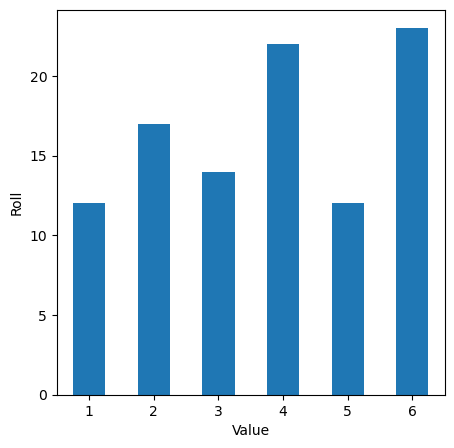

In [22]:
# Cuenta la frecuencua de los resultados (.value_counts) y ordena por el valor de los dados (.sort_index)
ax = roll_the_dice_100['value'].value_counts().sort_index().plot.bar(figsize=(5, 5)) 

ax.set_xlabel('Value') # Resultado de la cara del dado
ax.set_ylabel('Roll') # Número de veces que se repite el resultado del dado
ax.tick_params(axis='x', rotation=0) # Ajustar los paramétros del eje x para rotarlos en 0 grados
plt.show()

In [23]:
"""
The number six dice face is the one repeating the most, followed by No.4 and No.2
"""

'\nThe number six dice face is the one repeating the most, followed by No.4 and No.2\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [24]:
# your code here
def mean_sum(dataframe, column):
    row = 0
    col = 0
    for row, col_value in enumerate(dataframe[column]):
        col += col_value
        row += 1
    return col / row
mean_sum(roll_the_dice_100,'value')

3.74

#### 3.- Now, calculate the frequency distribution.


In [25]:
# your code here

freq100 = roll_the_dice_100['value'].value_counts().reset_index()
freq100['value'] = freq100['value'].astype('str')
freq100_df = freq100.rename(columns={"count":"Freq_abs"})
freq100_df

,value,Freq_abs
0,6,23
1,4,22
2,2,17
3,3,14
4,1,12
5,5,12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

In [26]:
# your code here

# np.shape(freq100_df) # ((6, 2))
freq100_df['Freq_rel_%'] = (100 * freq100_df['Freq_abs'] / freq100_df['Freq_abs'].sum()).round(2)
freq100_df

,value,Freq_abs,Freq_rel_%
0,6,23,23.0
1,4,22,22.0
2,2,17,17.0
3,3,14,14.0
4,1,12,12.0
5,5,12,12.0


In [27]:
freq100_df["Freq_rel_%"].values

array([23., 22., 17., 14., 12., 12.])

In [28]:
# Valores de frecuencias relativas "acumuladas"
freq_rel_val = freq100_df["Freq_rel_%"].values # array([23., 22., 17., 14., 12., 12.])
accumulate = []
counter = 0
for i in freq_rel_val: # Para cada elemento de freq_rel_val == array([23., 22., 17., 14., 12., 12.])
    counter += i 
    accumulate.append(counter)
freq100_df["Freq_rel_%_acum"] = accumulate # Se crea la nueva columna con los valores guardados en accumulate
freq100_df

,value,Freq_abs,Freq_rel_%,Freq_rel_%_acum
0,6,23,23.0,23.0
1,4,22,22.0,45.0
2,2,17,17.0,62.0
3,3,14,14.0,76.0
4,1,12,12.0,88.0
5,5,12,12.0,100.0


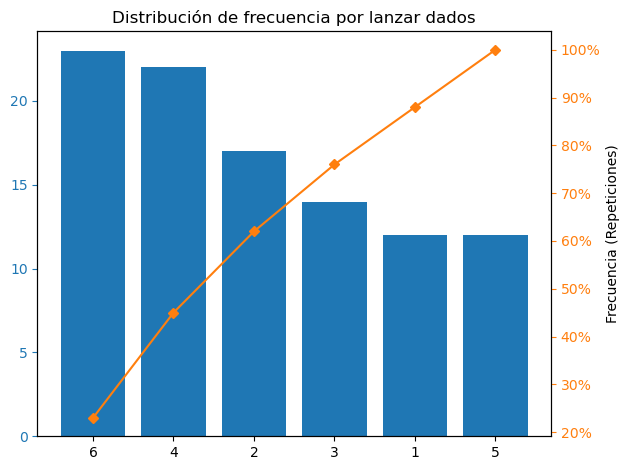

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_title('Distribución de frecuencia por lanzar dados')

ax.bar(freq100_df["value"],freq100_df["Freq_abs"], color="C0")

ax2 = ax.twinx()
ax2.plot(freq100_df.index, freq100_df["Freq_rel_%_acum"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

ax.set_xticks(freq100_df["value"])  # Utiliza set_xticks en lugar de set_xticklabels
ax.set_xticklabels(freq100_df["value"], rotation=0)

plt.xlabel("Caras del dado")
plt.ylabel("Frecuencia (Repeticiones)")

fig.tight_layout()
plt.show()

In [30]:
"""
El 80% de los resultados corresponden a las caras de los dados con más repeticiones. El valor de 6 con mayor número
de repeticiones, seguido del 4, 2 y 3.
"""

'\nEl 80% de los resultados corresponden a las caras de los dados con más repeticiones. El valor de 6 con mayor número\nde repeticiones, seguido del 4, 2 y 3.\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [31]:
# your code here

roll_the_dice_1000 = pd.read_csv('../data/roll_the_dice_thousand.csv',index_col=0)
roll_the_dice_1000

,roll,value
0,0,5
1,1,6
2,2,1
3,3,6
4,4,5
...,...,...
995,995,1
996,996,4
997,997,4
998,998,3


In [32]:
freq1000 = roll_the_dice_1000['value'].value_counts().reset_index()
freq1000['value'] = freq1000['value'].astype('str')
freq1000_df = freq1000.rename(columns={"count":"Freq_abs"})
freq1000_df

,value,Freq_abs
0,1,175
1,3,175
2,4,168
3,2,167
4,6,166
5,5,149


In [33]:
# np.shape(freq1000_df) # ((6, 2))
freq1000_df['Freq_rel_%'] = (100 * freq1000_df['Freq_abs'] / freq1000_df['Freq_abs'].sum()).round(2)
freq1000_df

,value,Freq_abs,Freq_rel_%
0,1,175,17.5
1,3,175,17.5
2,4,168,16.8
3,2,167,16.7
4,6,166,16.6
5,5,149,14.9


In [34]:
freq1000_df["Freq_rel_%"].values

array([17.5, 17.5, 16.8, 16.7, 16.6, 14.9])

In [35]:
# Valores de frecuencias relativas "acumuladas"
freq_rel_val = freq1000_df["Freq_rel_%"].values 
accumulate = []
counter = 0
for i in freq_rel_val: 
    counter += i 
    accumulate.append(counter)
freq1000_df["Freq_rel_%_acum"] = accumulate 
freq1000_df

,value,Freq_abs,Freq_rel_%,Freq_rel_%_acum
0,1,175,17.5,17.5
1,3,175,17.5,35.0
2,4,168,16.8,51.8
3,2,167,16.7,68.5
4,6,166,16.6,85.1
5,5,149,14.9,100.0


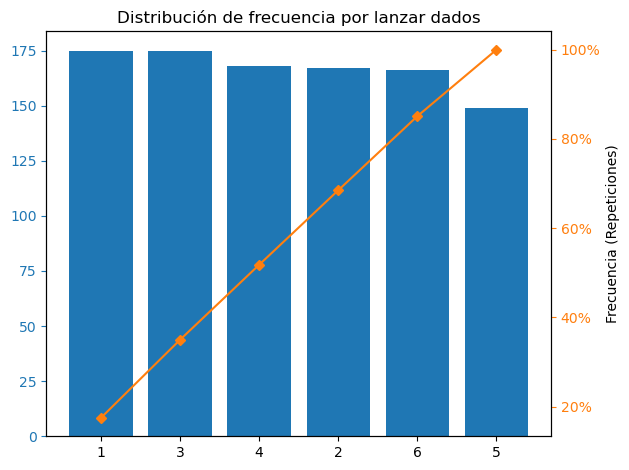

In [36]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_title('Distribución de frecuencia por lanzar dados')

ax.bar(freq1000_df["value"],freq1000_df["Freq_abs"], color="C0")

ax2 = ax.twinx()
ax2.plot(freq1000_df.index, freq1000_df["Freq_rel_%_acum"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

ax.set_xticks(freq1000_df["value"])  
ax.set_xticklabels(freq1000_df["value"], rotation=0)

plt.xlabel("Caras del dado")
plt.ylabel("Frecuencia (Repeticiones)")

fig.tight_layout()
plt.show()

In [37]:
"""
El 80% de los resultados excluye a la cara del dado valor 5, al igual que en el caso anterior.
"""

'\nEl 80% de los resultados excluye a la cara del dado valor 5, al igual que en el caso anterior.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [38]:
# your code here
ages_population = pd.read_csv('../data/ages_population.csv')
ages_population = ages_population.rename(columns={"observation":"Age"})
ages_population['Age'] = ages_population['Age'].sort_values().reset_index(drop=True)
ages_population

,Age
0,1.0
1,1.0
2,2.0
3,2.0
4,4.0
...,...
995,69.0
996,70.0
997,71.0
998,73.0


In [39]:
# your code here

freqage = ages_population['Age'].value_counts().sort_index()
freqage


Age
1.0     2
2.0     2
4.0     1
5.0     2
6.0     2
       ..
69.0    1
70.0    1
71.0    1
73.0    1
82.0    1
Name: count, Length: 72, dtype: int64

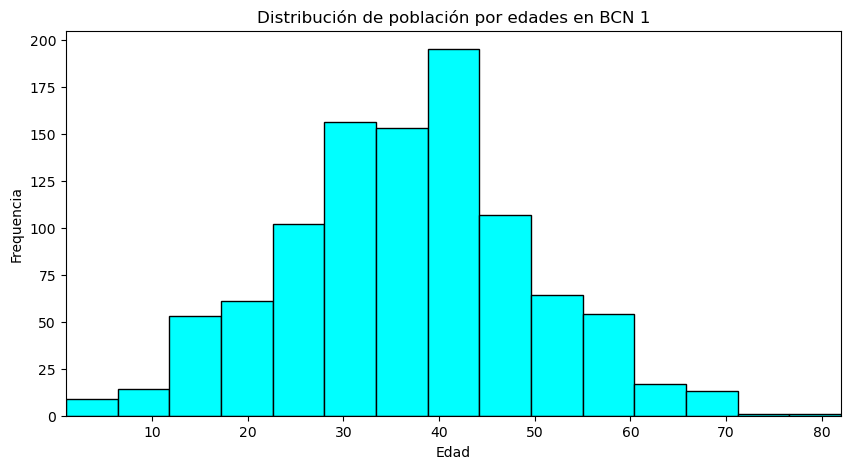

In [175]:
plt.figure(figsize=(10, 5))
plt.hist(ages_population['Age'], bins=15, color='cyan', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frequencia')
plt.title('Distribución de población por edades en BCN 1')
plt.xlim(1, 82)
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [77]:
# your code here
print(mean_sum(ages_population,'Age'))

def deviation(dataframe, column):
    variance = np.mean((dataframe[column] - mean_sum(dataframe, column))**2)
    std_dev = np.sqrt(variance)
    return std_dev

print(deviation(ages_population, 'Age'))

36.56
12.810089773299797


In [42]:
"""
Según el histograma, la media es menor a 40 (sin saber el número exacto a la vista), ya que se ve que el gráfico está
sesgado hacia la izquierda. También lo confirma la desviación estandar, que es grande y muy disperso en sentido negativo
(hacia la izquierda).
"""

'\nSegún el histograma, la media es menor a 40 (sin saber el número exacto a la vista), ya que se ve que el gráfico está\nsesgado hacia la izquierda. También lo confirma la desviación estandar, que es grande y muy disperso en sentido negativo\n(hacia la izquierda).\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [78]:
# your code here
ages_population2 = pd.read_csv('../data/ages_population2.csv')
ages_population2 = ages_population2.rename(columns={"observation":"Age"})
ages_population2['Age'] = ages_population2['Age'].sort_values().reset_index(drop=True)
ages_population2

,Age
0,19.0
1,19.0
2,19.0
3,20.0
4,20.0
...,...
995,35.0
996,35.0
997,35.0
998,36.0


In [79]:
# your code here

freqage2 = ages_population2['Age'].value_counts().sort_index()
freqage2

Age
19.0      3
20.0     13
21.0     17
22.0     35
23.0     41
24.0     78
25.0     98
26.0    120
27.0    125
28.0    139
29.0    115
30.0     90
31.0     61
32.0     31
33.0     22
34.0      7
35.0      3
36.0      2
Name: count, dtype: int64

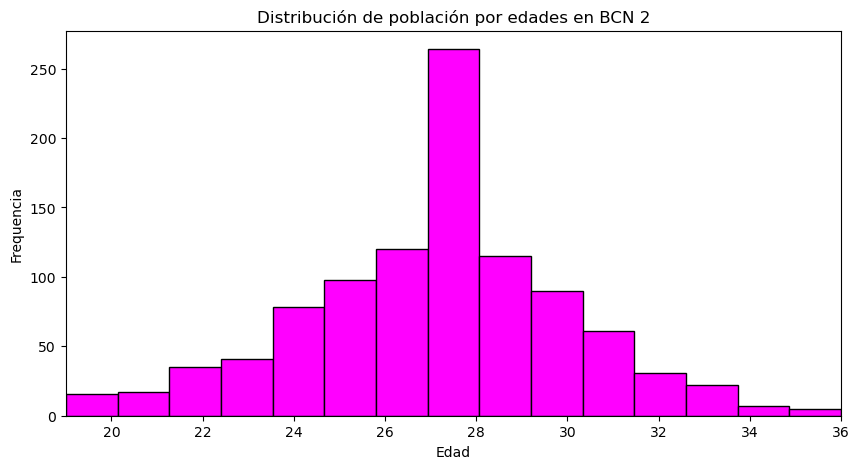

In [179]:
# your code here

plt.figure(figsize=(10, 5))
plt.hist(ages_population2['Age'], bins=15, color='magenta', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frequencia')
plt.title('Distribución de población por edades en BCN 2')
plt.xlim(19, 36)
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [46]:
print(mean_sum(ages_population2,'Age'))

27.155


#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [47]:
# your code here

print(deviation(ages_population2, 'Age'))

2.9683286543103677


In [48]:
"""
Se diferencia del anterior por estar muy centrada. El bin de la mitad (27.5) se aproxima al cálculo con la función
de la media (27.155) y la desviación estandar es muy pequeña (2.96), indicandonos que la dispersión entre datos
es mínima.
"""

'\nSe diferencia del anterior por estar muy centrada. El bin de la mitad (27.5) se aproxima al cálculo con la función\nde la media (27.155) y la desviación estandar es muy pequeña (2.96), indicandonos que la dispersión entre datos\nes mínima.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [116]:
# your code here
ages_population3 = pd.read_csv('../data/ages_population3.csv')
ages_population3 = ages_population3.rename(columns={"observation":"Age"})
ages_population3['Age'] = ages_population3['Age'].sort_values().reset_index(drop=True)
ages_population3

,Age
0,1.0
1,2.0
2,2.0
3,4.0
4,4.0
...,...
995,75.0
996,75.0
997,76.0
998,77.0


In [117]:
freqage3 = ages_population3['Age'].value_counts().sort_index()
freqage3

Age
1.0     1
2.0     2
4.0     2
5.0     1
7.0     1
       ..
73.0    6
74.0    6
75.0    2
76.0    1
77.0    2
Name: count, Length: 75, dtype: int64

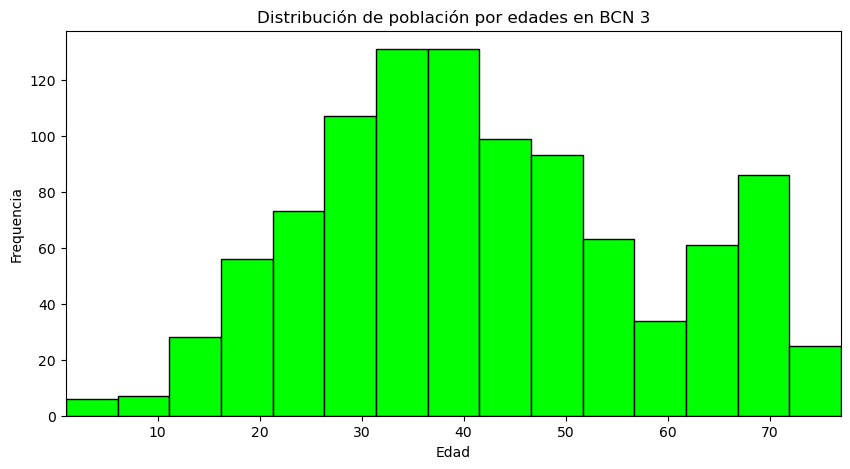

In [178]:
# your code here

plt.figure(figsize=(10, 5))
plt.hist(ages_population3['Age'], bins=15, color='lime', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frequencia')
plt.title('Distribución de población por edades en BCN 3')
plt.xlim(1, 77)
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [52]:
# your code here

print(mean_sum(ages_population3,'Age'))

print(deviation(ages_population3, 'Age'))

41.989
16.136631587788077


In [53]:
"""
En el primer plot la media es menor a 40 (36.56). 
En este tercer plot, la media es casi 42 y su desviación estandar es mas grande, lo cual presenta un sesgo positivo
(hacia la derecha).
"""

'\nEn el primer plot la media es menor a 40 (36.56). \nEn este tercer plot, la media es casi 42 y su desviación estandar es mas grande, lo cual presenta un sesgo positivo\n(hacia la derecha).\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [54]:
# your code here
def quartiling_2(dataframe, column):    
    sorted_values = np.sort(dataframe[column])   
    col_length = len(sorted_values)    
    q2 = medianing(dataframe, column) # Q2 => Mediana
    
    # Q1 => La mitad de la mediana o 25% de Q2
    q1 = q2 / 2
    
    # Q3 => Le sumamos la mitad de la mediana o Q1
    q3 = q2 + q1
    
    # Q4 => Por contexto, NO puede ser mayor a 6 porque es la cara del dado con el maximo valor
    q4 = q3 + q1  
   
    # Guardo los cuartiles en un diccionario
    quartiles_dict = {
        'Q1': q1,
        'Q2': q2,
        'Q3': q3,
        'Q4': q4
    }
    
    return quartiles_dict

quartiling_2(ages_population2, 'Age')

{'Q1': 13.5, 'Q2': 27.0, 'Q3': 40.5, 'Q4': 54.0}

In [55]:
"""
La diferencia entre la media y la mediana es de 0.5. Se podría decir que la distribución es simétrica.

Para este caso, NO hay outliers, ya que la edad mínima es 19 y la maxima es 36, lo cual no sobrepasan Q1 por debajo
ni Q3 por arriba.
"""

'\nLa diferencia entre la media y la mediana es de 0.5. Se podría decir que la distribución es simétrica.\n\nPara este caso, NO hay outliers, ya que la edad mínima es 19 y la maxima es 36, lo cual no sobrepasan Q1 por debajo\nni Q3 por arriba.\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [56]:
# your code here

def new_quartiling(dataframe, column):    
    sorted_values = np.sort(dataframe[column])   
    col_length = len(sorted_values)    
    q3 = medianing(dataframe, column) # Q3 (50%) => La nueva mediana
    
    # Q1 (10%)
    q1 = 0.2 * q3
    
    # Q2 (25%)   
    q2 = q3 * 0.5
    
    # Q4 => (75%)
    q4 = q3 + q2
    
    # Q5 (90%)
    q5 = q4 + q3 * 0.3
    
    # Q6 (95%)
    q6 = q4 + q3 * 0.4     
    
    quartiles_dict = {
        'Q1': q1,
        'Q2': q2,
        'Q3': q3,
        'Q4': q4,
        'Q5': q5,
        'Q6': q6
    }
    
    return quartiles_dict

### BCN 1 (age_population)

In [57]:
# Q3 es la mediana (50%)
print(new_quartiling(ages_population, 'Age'))

{'Q1': 7.4, 'Q2': 18.5, 'Q3': 37.0, 'Q4': 55.5, 'Q5': 66.6, 'Q6': 70.3}


### BCN 3 (age_population3)

In [58]:
# Q3 es la mediana (50%)
print(new_quartiling(ages_population3, 'Age'))

{'Q1': 8.0, 'Q2': 20.0, 'Q3': 40.0, 'Q4': 60.0, 'Q5': 72.0, 'Q6': 76.0}


In [59]:
"""
1. En Step 1 y Step 3, hay outliers por debajo de Q1.
2. En Step 1 hay un outlier por encima de Q6.
3. A partir de Q2 es la franja de personas mayores de edad o de 18 años
"""

'\n1. En Step 1 y Step 3, hay outliers por debajo de Q1.\n2. En Step 1 hay un outlier por encima de Q6.\n3. A partir de Q2 es la franja de personas mayores de edad o de 18 años\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their **similarities and their differences** backing your arguments in basic statistics.

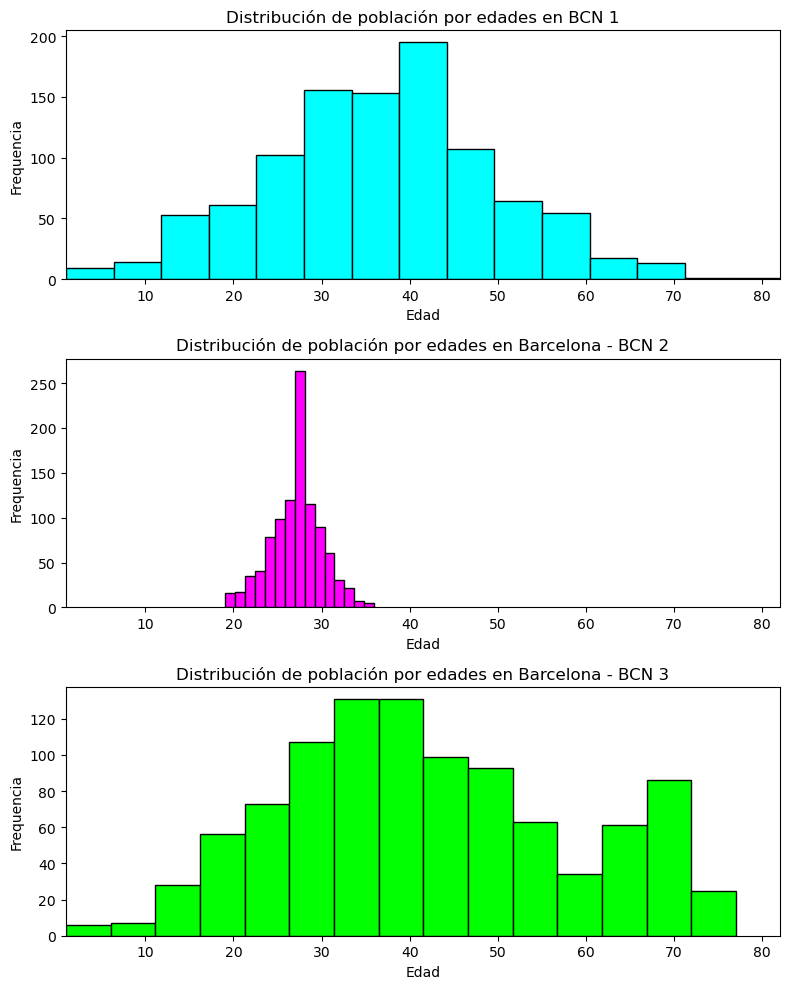

In [161]:
# your code here
plt.figure(figsize=(8, 10))

# Primer gráfico
plt.subplot(3, 1, 1)
plt.hist(ages_population['Age'], bins=15, color='cyan', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frequencia')
plt.title('Distribución de población por edades en BCN 1')
plt.xlim(1, 82)

# Segundo gráfico
plt.subplot(3, 1, 2)
plt.hist(ages_population2['Age'], bins=15, color='magenta',  edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frequencia')
plt.title('Distribución de población por edades en Barcelona - BCN 2')
plt.xlim(1, 82)

# Tercer gráfico
plt.subplot(3, 1, 3)
plt.hist(ages_population3['Age'], bins=15, color='lime', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frequencia')
plt.title('Distribución de población por edades en Barcelona - BCN 3')
plt.xlim(1, 82)

# Ajuste de diseño
plt.tight_layout()
plt.show()

In [162]:
"""
He colocado la misma escala en el eje x = 82, o plt.xlim(1, 82), para hacer una comparación más acertada:

Mis insights:

1. Similitudes: 

- Cada dataset (BCN 1-2-3) tiene una población de 1000 personas con el mismo tipo de gráfico (histograma)
- BCN 1 y 3, cada una tiene una media cercana a la otra (entre 36 y 42 años de edad)
- La mediana de BCN 1 y 3, son de 37 y 40 (respectivamente) con un rango de 3 unidades (muy cercanos)
- Por el rango de edades podemos decir que BCN 1 y BCN 3 son barrios tradicionales y familiares (abuelos y nietos)


2. Diferencias:

- BCN 2 destaca de los 3, por ser el histograma más estrecho por el eje x, siendo el menos disperso
- La media y la mediana es mucho menor para BCN 2 (27 años)
- Por el rango de edades, puede ser un barrio de vida nocturna, donde viven universitarios o millenials que 
    comparten piso.

"""

'\nHe colocado la misma escala en el eje x = 82, o plt.xlim(1, 82), para hacer una comparación más acertada:\n\nMis insights:\n\n1. Similitudes: \n\n- Cada dataset (BCN 1-2-3) tiene una población de 1000 personas con el mismo tipo de gráfico (histograma)\n- BCN 1 y 3, cada una tiene una media cercana a la otra (entre 36 y 42 años de edad)\n- La mediana de BCN 1 y 3, son de 37 y 40 (respectivamente) con un rango de 3 unidades (muy cercanos)\n- Por el rango de edades podemos decir que BCN 1 y BCN 3 son barrios tradicionales y familiares (abuelos y nietos)\n\n\n2. Diferencias:\n\n- BCN 2 destaca de los 3, por ser el histograma más estrecho por el eje x, siendo el menos disperso\n- La media y la mediana es mucho menor para BCN 2 (27 años)\n- Por el rango de edades, puede ser un barrio de vida nocturna, donde viven universitarios o millenials que \n    comparten piso.\n\n'

### En el diagrama de caja se puede resumir lo anterior mencionado:

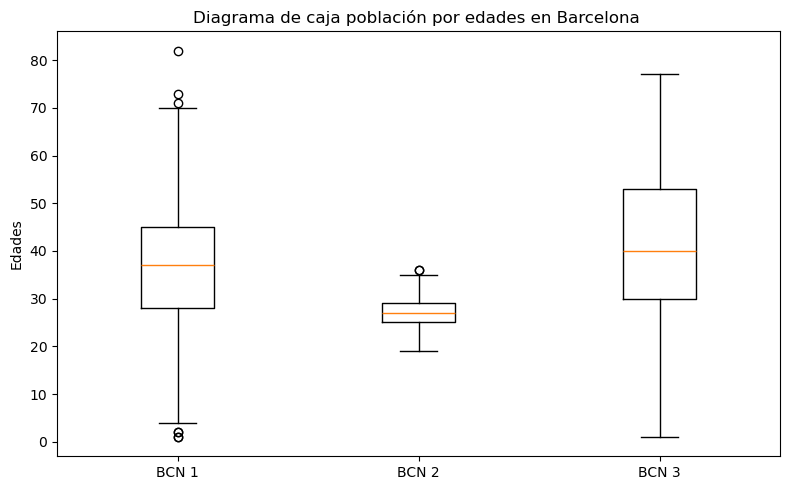

In [160]:
plt.figure(figsize=(8, 5))

plt.boxplot([ages_population['Age'], ages_population2['Age'], ages_population3['Age']],
            labels=['BCN 1', 'BCN 2', 'BCN 3'])
plt.title('Diagrama de caja población por edades en Barcelona ')
plt.ylabel('Edades')

plt.tight_layout()
plt.show()